<a href="https://colab.research.google.com/github/Jaime-Simoes/DL_project/blob/main/Copy_of_DL_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# to put all the imports necessary

import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import requests
import os
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

In [15]:
df = pd.read_csv('fitzpatrick17k.csv')

In [16]:
# get names of columns

columns = df.columns.tolist()
print(columns)

['md5hash', 'fitzpatrick_scale', 'fitzpatrick_centaur', 'label', 'nine_partition_label', 'three_partition_label', 'qc', 'url', 'url_alphanum']


In [17]:
print(len(df))      # amount of occurences

3929


In [18]:
df.isnull().sum()     # missing values

md5hash                     0
fitzpatrick_scale           0
fitzpatrick_centaur         0
label                       0
nine_partition_label        0
three_partition_label       0
qc                       3812
url                        13
url_alphanum                0
dtype: int64

In [19]:
df.isna().sum()

md5hash                     0
fitzpatrick_scale           0
fitzpatrick_centaur         0
label                       0
nine_partition_label        0
three_partition_label       0
qc                       3812
url                        13
url_alphanum                0
dtype: int64

In [20]:
print(df.duplicated(subset=['md5hash']).sum())

# First column has no repeated values. It's codes of some sort to identify each occurence.
# So we can delete this column.

0


In [21]:
df.drop(columns=['md5hash'], inplace=True)

In [22]:
# qc might be quality control

In [23]:
print(df['qc'].value_counts())     # numbers before are part of the names

# need to discuss this, not sure what's going on

1 Diagnostic          82
5 Potentially         20
2 Characteristic       9
3 Wrongly labelled     5
4 Other                1
Name: qc, dtype: int64


In [24]:
print(df['label'].value_counts())      # our target variable. lenght = 114 ;

psoriasis                      177
squamous cell carcinoma        117
allergic contact dermatitis    113
sarcoidosis                    107
lupus erythematosus            106
                              ... 
erythema nodosum                11
port wine stain                 11
tungiasis                       11
erythema elevatum diutinum      10
myiasis                          8
Name: label, Length: 114, dtype: int64


In [25]:
duplicate_url = df.duplicated(subset=['url'])
print(duplicate_url.value_counts())

# 40 url repeat. Let's see if the whole line is equal (except 1st column that is some weird code)

False    3917
True       12
dtype: int64


In [26]:
print(df.iloc[:, 1:].duplicated().sum())     # duplicate rows except first column

# so there are 40 repeated url but no repeated rows. Meaning equal pictures have
# different attributes. need to discuss this.

0


In [27]:
print(df.iloc[:, [i for i in range(len(df.columns)) if i not in [0, 6]]].duplicated().sum())

0


In [28]:
print(df['nine_partition_label'].value_counts())
# categorize skin conditions by 9

inflammatory                    2640
benign dermal                    272
malignant epidermal              271
genodermatoses                   230
benign epidermal                 204
malignant melanoma               164
benign melanocyte                 80
malignant dermal                  37
malignant cutaneous lymphoma      31
Name: nine_partition_label, dtype: int64


In [29]:
print(df['three_partition_label'].value_counts())
# categorize skin conditions by 3

non-neoplastic    2870
benign             556
malignant          503
Name: three_partition_label, dtype: int64


In [30]:
# Get distributions of numerical columns

In [31]:
# "fitzpatrick_scale" -> classification system used to categorize human skin color based on its response to sun exposure or UV light.
# Scale is from 1 to 6. (-1) instances are missing values.

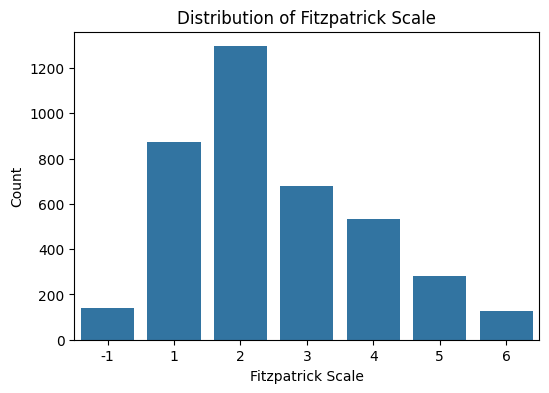

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='fitzpatrick_scale')
plt.title('Distribution of Fitzpatrick Scale')
plt.xlabel('Fitzpatrick Scale')
plt.ylabel('Count')
plt.show()

In [33]:
# Need to discuss what to do with these missing values!

In [34]:
missing_fitzscale = df[df['fitzpatrick_scale'] == -1]
print(missing_fitzscale['fitzpatrick_centaur'].value_counts())

# big correlation between missing values of fitz columns. The other values follow the
# reference distribution, aka proportional to existing values.

-1    70
 2    30
 1    23
 5     7
 4     7
 3     4
 6     1
Name: fitzpatrick_centaur, dtype: int64


In [35]:
print(missing_fitzscale['nine_partition_label'].value_counts())

# Here is a bit off but not mutch.

inflammatory           89
benign dermal          17
malignant epidermal    13
genodermatoses          9
malignant melanoma      7
benign epidermal        6
benign melanocyte       1
Name: nine_partition_label, dtype: int64


In [36]:
print(missing_fitzscale['three_partition_label'].value_counts())

# Also different.

non-neoplastic    98
benign            24
malignant         20
Name: three_partition_label, dtype: int64


In [37]:
# "fitzpatrick_centaur" -> don't know what this is. Most likely (-1) are also missing values.

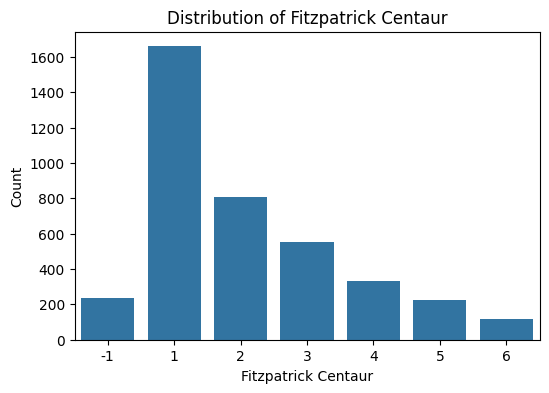

In [38]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='fitzpatrick_centaur')
plt.title('Distribution of Fitzpatrick Centaur')
plt.xlabel('Fitzpatrick Centaur')
plt.ylabel('Count')
plt.show()

In [39]:
# Need to discuss what to do with these missing values!

In [40]:
missing_fitzcentaur = df[df['fitzpatrick_centaur'] == -1]
print(missing_fitzcentaur['nine_partition_label'].value_counts())

# Different from scale column.

inflammatory           136
benign dermal           43
malignant epidermal     25
benign epidermal        12
malignant melanoma      10
genodermatoses           5
malignant dermal         2
benign melanocyte        2
Name: nine_partition_label, dtype: int64


In [41]:
print(missing_fitzcentaur['three_partition_label'].value_counts())

non-neoplastic    141
benign             57
malignant          37
Name: three_partition_label, dtype: int64


In [42]:
# Now let's apply one hot encoding for categorical variables

In [43]:
one_hot_encode = ["label", "nine_partition_label", "three_partition_label"]

new_df = pd.get_dummies(df, columns=one_hot_encode)

In [44]:
new_df.head()

,fitzpatrick_scale,fitzpatrick_centaur,qc,url,url_alphanum,label_acanthosis nigricans,label_acne,label_acne vulgaris,label_acquired autoimmune bullous diseaseherpes gestationis,label_acrodermatitis enteropathica,...,nine_partition_label_benign melanocyte,nine_partition_label_genodermatoses,nine_partition_label_inflammatory,nine_partition_label_malignant cutaneous lymphoma,nine_partition_label_malignant dermal,nine_partition_label_malignant epidermal,nine_partition_label_malignant melanoma,three_partition_label_benign,three_partition_label_malignant,three_partition_label_non-neoplastic
0,3,3,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicmminoc...,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicpphoto...,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2,3,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicdderma...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,1,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1,1,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [45]:
new_df.shape

(3929, 131)

In [46]:
# This will give problems later on for sure but for now keep it like this. To apply CNN needs to be one hot encoded.

In [47]:
# Need to see if column "qc" is built in a certain specific way that makes sense. If not almost everything is missing values so it
# will be worse to keep it I think. Delete for now:

In [48]:
new_df.drop(columns=['qc'], inplace=True)

In [49]:
# Let's deal with the missing values in url. url_alphanum doesn't have any.

In [50]:
new_df['url'].fillna(df['url_alphanum'], inplace=True)

In [51]:
print(new_df['url'].isnull().sum())

0


In [52]:


# Filter rows where 'url' column has been filled with values from 'url_alphanum'
filled_rows = new_df['url'] == new_df['url_alphanum']
print(new_df.loc[filled_rows, 'url'])

145     httpwwwdermaamincomsiteimagesclinicalpicLLiche...
349     httpwwwdermaamincomsiteimagesclinicalpicooralm...
535     httpwwwdermaamincomsiteimagesclinicalpicLLiche...
868     httpwwwdermaamincomsiteimagesclinicalpicLLiche...
879     httpwwwdermaamincomsiteimagesclinicalpicooralm...
918     httpwwwdermaamincomsiteimagesclinicalpicLLiche...
1322    httpwwwdermaamincomsiteimagesclinicalpicLLiche...
1958    httpwwwdermaamincomsiteimageshistopicjjunction...
1972    httpwwwdermaamincomsiteimagesclinicalpicLLiche...
2078    httpwwwdermaamincomsiteimagesclinicalpicLLiche...
2519    httpwwwdermaamincomsiteimagesclinicalpicLLiche...
3601    httpwwwdermaamincomsiteimagesclinicalpicLLiche...
3672    httpwwwdermaamincomsiteimagesclinicalpicLLiche...
Name: url, dtype: object


In [53]:
# Define the function to convert the URL
def convert_url(url):
    url = url.replace("httpwwwdermaamincom", "https://www.dermaamin.com")
    url = url.replace("siteimages", "site/images/")
    url = url.replace("clinicalpicLLichensimplexchronicusLichensimplexchronicus", "clinical-pic/l/lichensimplexchronicus/lichensimplexchronicus")
    url = url.replace("site/images/l/", "site/images/")
    url = url.replace("jpg.jpg", ".jpg")
    url = url.replace("jpg", "jpg")
    url = url.replace("com", "com/")
    return url

# Apply the conversion function to the filtered rows
df_3 = new_df.copy()  # Create a copy of the DataFrame to avoid modifying the original
df_3.loc[filled_rows, 'url'] = df_3.loc[filled_rows, 'url'].apply(convert_url)

# Print the modified 'url' column
print(df_3.loc[filled_rows, 'url'])

145     https://www.dermaamin.com/site/images/clinical...
349     https://www.dermaamin.com/site/images/clinical...
535     https://www.dermaamin.com/site/images/clinical...
868     https://www.dermaamin.com/site/images/clinical...
879     https://www.dermaamin.com/site/images/clinical...
918     https://www.dermaamin.com/site/images/clinical...
1322    https://www.dermaamin.com/site/images/clinical...
1958    https://www.dermaamin.com/site/images/histopic...
1972    https://www.dermaamin.com/site/images/clinical...
2078    https://www.dermaamin.com/site/images/clinical...
2519    https://www.dermaamin.com/site/images/clinical...
3601    https://www.dermaamin.com/site/images/clinical...
3672    https://www.dermaamin.com/site/images/clinical...
Name: url, dtype: object


In [54]:
def download_image(image_url, file_place):
    """
    Downloads images from URLs.

    Inputs:
        image_url(str): URL of the image to download.
        file_place(str): Path where the downloaded image will be saved.

    Outputs:
        None.
    """
    # Step 1: Send a GET request to the provided image URL
    res = requests.get(image_url, stream=True, headers={'User-Agent': "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36"})

    # Step 2: Check if the request was successful (HTTP status code 200)
    if res.status_code == 200:
        # Step 3: If successful, open the file at the specified location in binary write mode
        with open(file_place, 'wb') as f:
          shutil.copyfileobj(res.raw, f) # Step 4: Copy the content of the response to the file
        # Step 5: Print the status of the download

    else:
        print("Image coulnd't be retrieved")

In [58]:
def download_images_from_csv(csv_file, url_column_name, output_folder, label_column_name):
    """
    Downloads images from URLs listed in a CSV file.

    Inputs:
        csv_file (str): Path to the CSV file containing image URLs and labels.
        url_column_name (str): Name of the column containing image URLs.
        output_folder (str): Path to the folder where images will be saved.
        label_column_name (str): Name of the column containing labels.

    Outputs:
        None.
    """
    os.makedirs(output_folder, exist_ok=True)  # Create the output folder if it doesn't exist

    data = pd.read_csv(csv_file)  # Step1: Read CSV
    for index, row in data.iterrows(): # Step 2: Iterate throught a loop for extract the url from the column
        image_url = row[url_column_name]
        label = row[label_column_name]
        if isinstance(image_url, str) and not pd.isnull(image_url):  # Step 3: Check for NaN in URL column
            filename = f"{output_folder}/{label}_{index}.jpg" # Step 4: generate a file for the downloaded image
            download_image(image_url, filename) # Step 5: The download_image function downloads the image from the URL and saves it to the specified file
        else:
            print(f"Skipping row {index} due to missing or invalid URL.")

In [ ]:
csv_file = './fitzpatrick17k.csv'  # CSV file path
url_column_name = 'url'
label_column_name = 'label'
output_folder = 'project_pic'  # folder where to save downloaded images
download_images_from_csv(csv_file, url_column_name, output_folder, label_column_name)

Skipping row 145 due to missing or invalid URL.


In [ ]:
# Rows being skipped are the ones that had the url replaced. Maybe new url is wrong or there is just on picture for those rows.
# Discuss if we can just delete those rows. About 40 in the whole dataset.

In [ ]:
# now let's try to read urls

In [ ]:
# Select a URL from the DataFrame (e.g., the first URL)
sample_url = df['url'].iloc[0]

# Try accessing the URL
response = requests.get(sample_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    print("URL accessed successfully.")
else:
    print("Failed to access the URL.")

Failed to access the URL.


In [ ]:
headers = {'Accept': 'image/jpeg, image/png, */*'}
response = requests.get(sample_url, headers=headers)

In [ ]:
# Select a URL from the DataFrame (e.g., the first URL)
sample_url = df['url'].iloc[0]

try:
    # Try accessing the URL
    response = requests.get(sample_url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        print("URL accessed successfully.")
    else:
        print(f"Failed to access the URL. Status code: {response.status_code}")
except Exception as e:
    print(f"An error occurred: {str(e)}")

Failed to access the URL. Status code: 406


In [ ]:
# Manually specify a URL from the "url" column
sample_url = "https://www.dermaamin.com/site/images/clinical-pic/p/photosensitivity/photosensitivity18.jpg"

# Try accessing the URL
response = requests.get(sample_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    print("URL accessed successfully.")
else:
    print("Failed to access the URL.")

Failed to access the URL.
